# Census Income Project

Description: This dataset was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics).
These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.
    
The main objective of this dataset is to perform a predictive task of Binary classification to predict whether an individual makes over 50K a year or less,by using different classification Machine Learning Algorithms.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Getting the Dataset

In [3]:
ci=pd.read_csv("Census_Income.csv")

In [4]:
ci

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
1,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
2,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
3,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
4,37,Private,284582.0,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10237,20,Private,201204.0,HS-grad,9.0,Never-married,Handlers-cleaners,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
10238,24,Private,197666.0,Bachelors,13.0,Never-married,Exec-managerial,Not-in-family,White,Female,0.0,0.0,40.0,United-States,<=50K
10239,29,Private,162002.0,HS-grad,9.0,Never-married,Other-service,Own-child,White,Female,0.0,0.0,35.0,United-States,<=50K
10240,31,Private,263561.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,2246.0,45.0,United-States,>50K


In [5]:
ci.head()  #getting the first 5 rows

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
1,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
2,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
3,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
4,37,Private,284582.0,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K


In [6]:
#Analysing The Dataset

In [7]:
ci.shape

(10242, 15)

In [8]:
ci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10242 entries, 0 to 10241
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             10242 non-null  int64  
 1   Workclass       10242 non-null  object 
 2   Fnlwgt          10241 non-null  float64
 3   Education       10241 non-null  object 
 4   Education_num   10241 non-null  float64
 5   Marital_status  10241 non-null  object 
 6   Occupation      10241 non-null  object 
 7   Relationship    10241 non-null  object 
 8   Race            10241 non-null  object 
 9   Sex             10241 non-null  object 
 10  Capital_gain    10241 non-null  float64
 11  Capital_loss    10241 non-null  float64
 12  Hours_per_week  10241 non-null  float64
 13  Native_country  10241 non-null  object 
 14  Income          10241 non-null  object 
dtypes: float64(5), int64(1), object(9)
memory usage: 1.2+ MB


Thus we can onserve that there ae total 15 columns with 10242 rows. In which there are 9 object type features, 1 intezer type, 5 float type.
We can also see that there are few missing values also possible values are categorical and numerical columns.

In [9]:
#checking the null values

In [10]:
ci.isnull().sum()

Age               0
Workclass         0
Fnlwgt            1
Education         1
Education_num     1
Marital_status    1
Occupation        1
Relationship      1
Race              1
Sex               1
Capital_gain      1
Capital_loss      1
Hours_per_week    1
Native_country    1
Income            1
dtype: int64

Thus here we can see that there are 1 missing values in column: Fnlwgt, Education, Education_num, Marital_status, Occupation, Relationship,
Race, Sex, Capital_gain, Capital_loss, Hours_per_week, Native_country, Income. These missing values need to fill later.
Both categorical and numerical values are present in this dataset.

In [11]:
ci.describe() #statistical summary

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,10242.000000,1.024100e+04,10241.000000,10241.000000,10241.000000,10241.000000
mean,38.416911,1.905745e+05,10.074309,1048.677082,86.693487,40.535104
std,13.606326,1.059872e+05,2.546989,7201.425618,398.729516,12.304572
min,17.000000,1.930200e+04,1.000000,0.000000,0.000000,1.000000
25%,27.000000,1.186190e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.791120e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.389440e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.226583e+06,16.000000,99999.000000,4356.000000,99.000000


In Above table we can see the statistical summary of this dataset showing the mean, median, standard deviation, range and count of all columns.

# Data Cleaning

Filling the missing values

In [12]:
ci['Sex'].fillna(ci['Sex'].mode()[0], inplace=True)

In [13]:
ci['Education'].fillna(ci['Education'].mode()[0], inplace=True)

In [14]:
ci['Marital_status'].fillna(ci['Marital_status'].mode()[0], inplace=True)

In [15]:
ci['Occupation'].fillna(ci['Occupation'].mode()[0], inplace=True)

In [16]:
ci['Relationship'].fillna(ci['Relationship'].mode()[0], inplace=True)

In [17]:
ci['Race'].fillna(ci['Race'].mode()[0], inplace=True)

In [18]:
ci['Native_country'].fillna(ci['Native_country'].mode()[0], inplace=True)

In [19]:
ci['Income'].fillna(ci['Income'].mode()[0], inplace=True)

In [20]:
ci['Fnlwgt'].fillna(ci['Fnlwgt'].mean(), inplace=True)

In [21]:
ci['Education_num'].fillna(ci['Education_num'].mean(), inplace=True)

In [22]:
ci['Capital_gain'].fillna(ci['Capital_gain'].mean(), inplace=True)

In [23]:
ci['Capital_loss'].fillna(ci['Capital_loss'].mean(), inplace=True)

In [24]:
ci['Hours_per_week'].fillna(ci['Hours_per_week'].mean(), inplace=True)

In [25]:
#Rechecking null values again

In [26]:
ci.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Thus here we can see there are no null values.

# EDA

Univariant Analysis

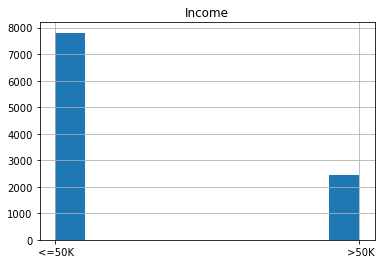

In [27]:
ci['Income'].hist(grid=True)
plt.title("Income")
plt.show()

From above graph we can analyse that only 35% income is less than 50K rest 65% are greater than and equal to 50K.

Bivariant Analysis

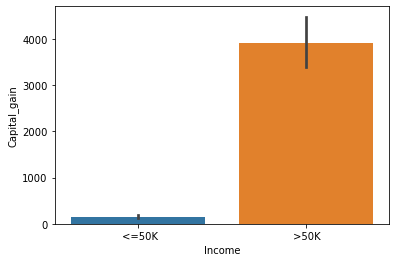

In [28]:
sns.barplot(data=ci, x='Income', y='Capital_gain')
plt.show()

People with high Capital gain(Income from investment sources) having income less than 50K

In [29]:
numerical_columns=['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']

In [30]:
print(numerical_columns)

['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


In [31]:
categorical_columns=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']

In [32]:
print(categorical_columns)

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


In [33]:
#Visualization on Numerical columns

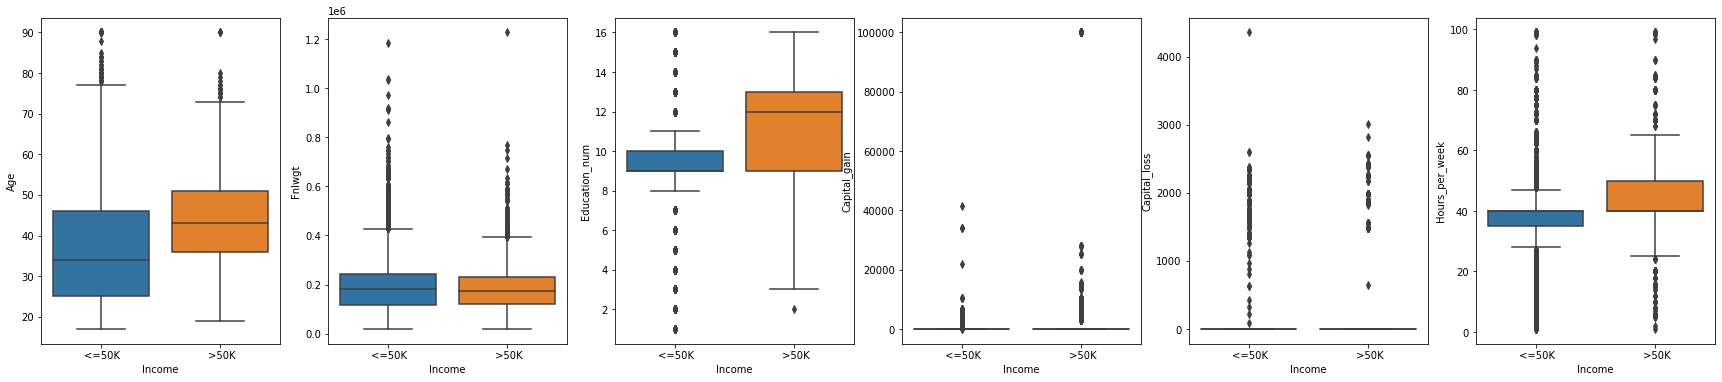

In [34]:
fig,axes = plt.subplots(1,6,figsize=(30,6))
for idx,cate_col in enumerate(numerical_columns):
    sns.boxplot(y=cate_col,data=ci,x='Income',ax=axes[idx])
plt.subplots_adjust(hspace=2)

Above graph shows the how numerical columns are related to target variable 'Income' Here we can also observe that Capital_gain and Capital_Loss are much related in predicting Income

<AxesSubplot:xlabel='count', ylabel='Workclass'>

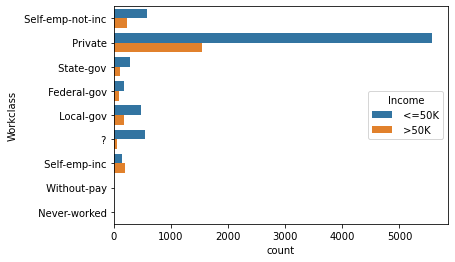

In [35]:
sns.countplot(y='Workclass', hue='Income', data = ci)

From above graph we can see that people working in Private workclass are having more Income <= 50K in comparison to other workclasses.

<AxesSubplot:xlabel='count', ylabel='Occupation'>

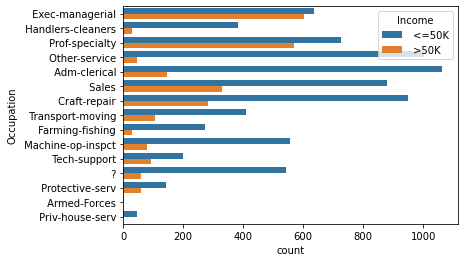

In [36]:
sns.countplot(y='Occupation', hue='Income', data = ci)

Here we can see that people in Adm-clerical and other services are having income <=50k

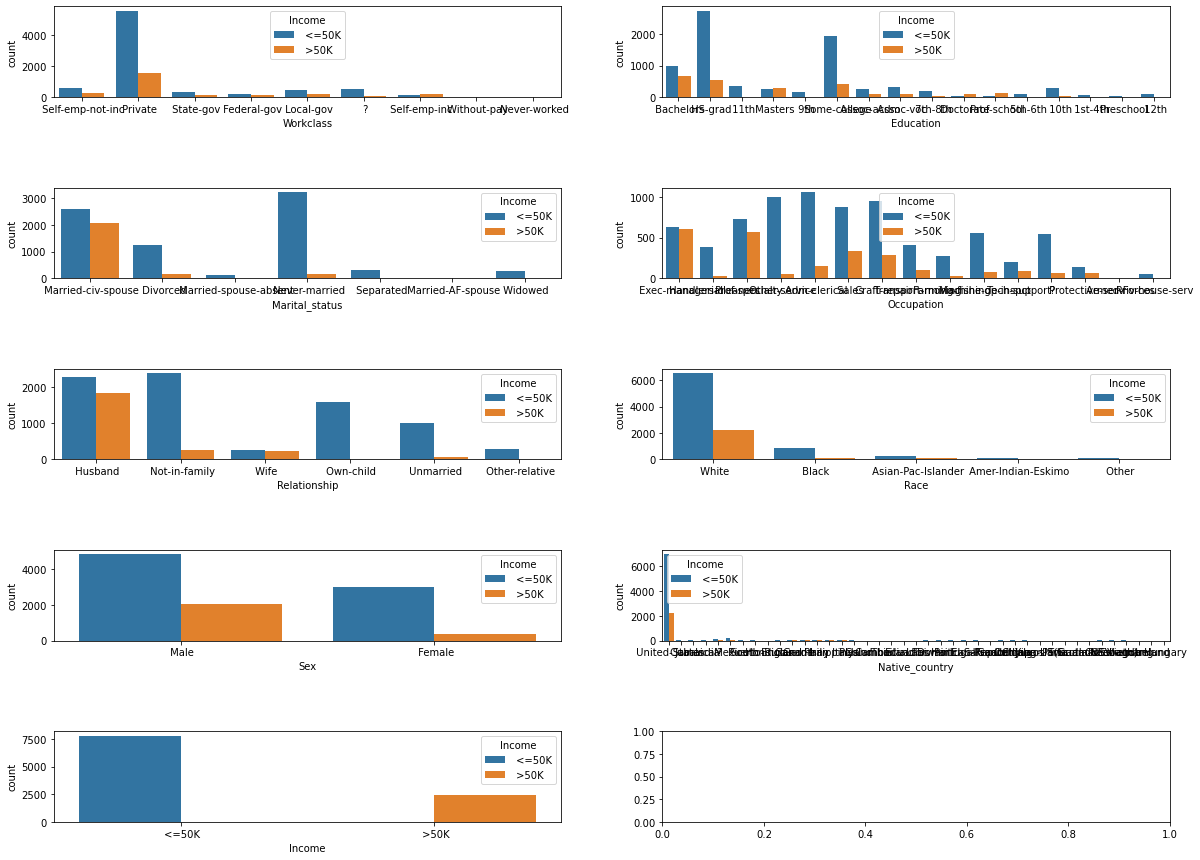

In [37]:
fig,axes = plt.subplots(5,2,figsize=(20,15))
for idx,cate_col in enumerate(categorical_columns):
    rows,col = idx//2,idx%2
    sns.countplot(x=cate_col,data=ci,hue='Income',ax=axes[rows,col])
plt.subplots_adjust(hspace=1)

All above graphs are showing relation between Income and all categorical columns.

# Encoding

In [38]:
categorical_columns = ci.select_dtypes(include=['object'])
categorical_columns.columns

Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
      dtype='object')

In [39]:
#Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

for i in ci.columns:
    if ci[i].dtypes=="object":
        ci[i]=oe.fit_transform(ci[i].values.reshape(-1,1))

In [40]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#categorical_columns = categorical_columns.apply(le.fit_transform)
#categorical_columns.head()

In [41]:
#categorical_columns = categorical_columns.apply(le.fit_transform)
#categorical_columns.head()

In [42]:
ci.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311.0,9.0,13.0,2.0,4.0,0.0,4.0,1.0,0.0,0.0,13.0,38.0,0.0
1,38,4.0,215646.0,11.0,9.0,0.0,6.0,1.0,4.0,1.0,0.0,0.0,40.0,38.0,0.0
2,53,4.0,234721.0,1.0,7.0,2.0,6.0,0.0,2.0,1.0,0.0,0.0,40.0,38.0,0.0
3,28,4.0,338409.0,9.0,13.0,2.0,10.0,5.0,2.0,0.0,0.0,0.0,40.0,5.0,0.0
4,37,4.0,284582.0,12.0,14.0,2.0,4.0,5.0,4.0,0.0,0.0,0.0,40.0,38.0,0.0
5,49,4.0,160187.0,6.0,5.0,3.0,8.0,1.0,2.0,0.0,0.0,0.0,16.0,22.0,0.0
6,52,6.0,209642.0,11.0,9.0,2.0,4.0,0.0,4.0,1.0,0.0,0.0,45.0,38.0,1.0
7,31,4.0,45781.0,12.0,14.0,4.0,10.0,1.0,4.0,0.0,14084.0,0.0,50.0,38.0,1.0
8,42,4.0,159449.0,9.0,13.0,2.0,4.0,0.0,4.0,1.0,5178.0,0.0,40.0,38.0,1.0
9,37,4.0,280464.0,15.0,10.0,2.0,4.0,0.0,2.0,1.0,0.0,0.0,80.0,38.0,1.0


In [43]:
#Analysis with income

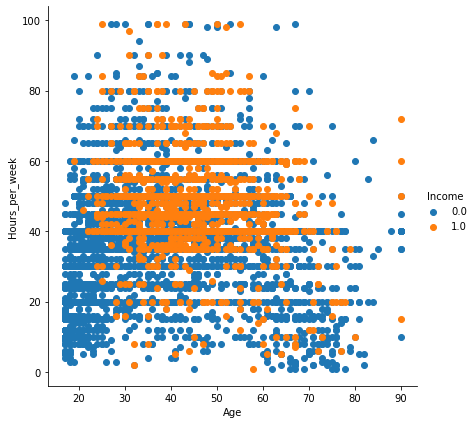

In [44]:
sns.FacetGrid(data=ci, hue='Income', size=6).map(plt.scatter, 'Age', 'Hours_per_week').add_legend()

Here we can observe that maximum people with age between 25 to 70 earn more than 50k.
Maximum people who work atleast 36 to 70 hours a week earn more tahn 50k.


In [45]:
ci

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311.000000,9.0,13.000000,2.0,4.0,0.0,4.0,1.0,0.000000,0.000000,13.000000,38.0,0.0
1,38,4.0,215646.000000,11.0,9.000000,0.0,6.0,1.0,4.0,1.0,0.000000,0.000000,40.000000,38.0,0.0
2,53,4.0,234721.000000,1.0,7.000000,2.0,6.0,0.0,2.0,1.0,0.000000,0.000000,40.000000,38.0,0.0
3,28,4.0,338409.000000,9.0,13.000000,2.0,10.0,5.0,2.0,0.0,0.000000,0.000000,40.000000,5.0,0.0
4,37,4.0,284582.000000,12.0,14.000000,2.0,4.0,5.0,4.0,0.0,0.000000,0.000000,40.000000,38.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10237,20,4.0,201204.000000,11.0,9.000000,4.0,6.0,3.0,4.0,1.0,0.000000,0.000000,40.000000,38.0,0.0
10238,24,4.0,197666.000000,9.0,13.000000,4.0,4.0,1.0,4.0,0.0,0.000000,0.000000,40.000000,38.0,0.0
10239,29,4.0,162002.000000,11.0,9.000000,4.0,8.0,3.0,4.0,0.0,0.000000,0.000000,35.000000,38.0,0.0
10240,31,4.0,263561.000000,9.0,13.000000,2.0,4.0,0.0,4.0,1.0,0.000000,2246.000000,45.000000,38.0,1.0


In [46]:
#pd.set_option('display.float_format', '{:.0f}'.format)

In [47]:
ci.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311.0,9.0,13.0,2.0,4.0,0.0,4.0,1.0,0.0,0.0,13.0,38.0,0.0
1,38,4.0,215646.0,11.0,9.0,0.0,6.0,1.0,4.0,1.0,0.0,0.0,40.0,38.0,0.0
2,53,4.0,234721.0,1.0,7.0,2.0,6.0,0.0,2.0,1.0,0.0,0.0,40.0,38.0,0.0
3,28,4.0,338409.0,9.0,13.0,2.0,10.0,5.0,2.0,0.0,0.0,0.0,40.0,5.0,0.0
4,37,4.0,284582.0,12.0,14.0,2.0,4.0,5.0,4.0,0.0,0.0,0.0,40.0,38.0,0.0
5,49,4.0,160187.0,6.0,5.0,3.0,8.0,1.0,2.0,0.0,0.0,0.0,16.0,22.0,0.0
6,52,6.0,209642.0,11.0,9.0,2.0,4.0,0.0,4.0,1.0,0.0,0.0,45.0,38.0,1.0
7,31,4.0,45781.0,12.0,14.0,4.0,10.0,1.0,4.0,0.0,14084.0,0.0,50.0,38.0,1.0
8,42,4.0,159449.0,9.0,13.0,2.0,4.0,0.0,4.0,1.0,5178.0,0.0,40.0,38.0,1.0
9,37,4.0,280464.0,15.0,10.0,2.0,4.0,0.0,2.0,1.0,0.0,0.0,80.0,38.0,1.0


# Checking Correlation

In [48]:
ci.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.018405,-0.070129,-0.025179,0.024946,-0.260931,-0.021274,-0.258176,0.026836,0.081497,0.064627,0.058311,0.062728,-0.006937,0.231252
Workclass,0.018405,1.000000,-0.014333,0.015903,0.060097,-0.072047,0.260020,-0.102081,0.042490,0.101859,0.038221,0.007565,0.138402,-0.011892,0.065372
Fnlwgt,-0.070129,-0.014333,1.000000,-0.045285,-0.050379,0.040266,0.006305,0.010338,-0.022662,0.033022,-0.000523,-0.006732,-0.020728,-0.052057,-0.016223
Education,-0.025179,0.015903,-0.045285,1.000000,0.355821,-0.019797,-0.024069,0.000256,0.015179,-0.033177,0.032884,0.017392,0.039806,0.064101,0.068061
Education_num,0.024946,0.060097,-0.050379,0.355821,1.000000,-0.051395,0.114178,-0.089836,0.030961,0.009102,0.122987,0.076742,0.141899,0.043314,0.326429
Marital_status,-0.260931,-0.072047,0.040266,-0.019797,-0.051395,1.000000,-0.018532,0.174245,-0.075447,-0.117991,-0.050926,-0.028044,-0.198565,-0.018596,-0.198437
Occupation,-0.021274,0.260020,0.006305,-0.024069,0.114178,-0.018532,1.000000,-0.084760,0.004660,0.095596,0.036536,0.016286,0.094399,-0.024517,0.082860
Relationship,-0.258176,-0.102081,0.010338,0.000256,-0.089836,0.174245,-0.084760,1.000000,-0.114748,-0.571634,-0.049301,-0.057342,-0.252239,-0.003241,-0.241978
Race,0.026836,0.042490,-0.022662,0.015179,0.030961,-0.075447,0.004660,-0.114748,1.000000,0.089330,0.015729,0.021054,0.038331,0.128970,0.080283
Sex,0.081497,0.101859,0.033022,-0.033177,0.009102,-0.117991,0.095596,-0.571634,0.089330,1.000000,0.043360,0.058664,0.223033,-0.011697,0.203233


<AxesSubplot:>

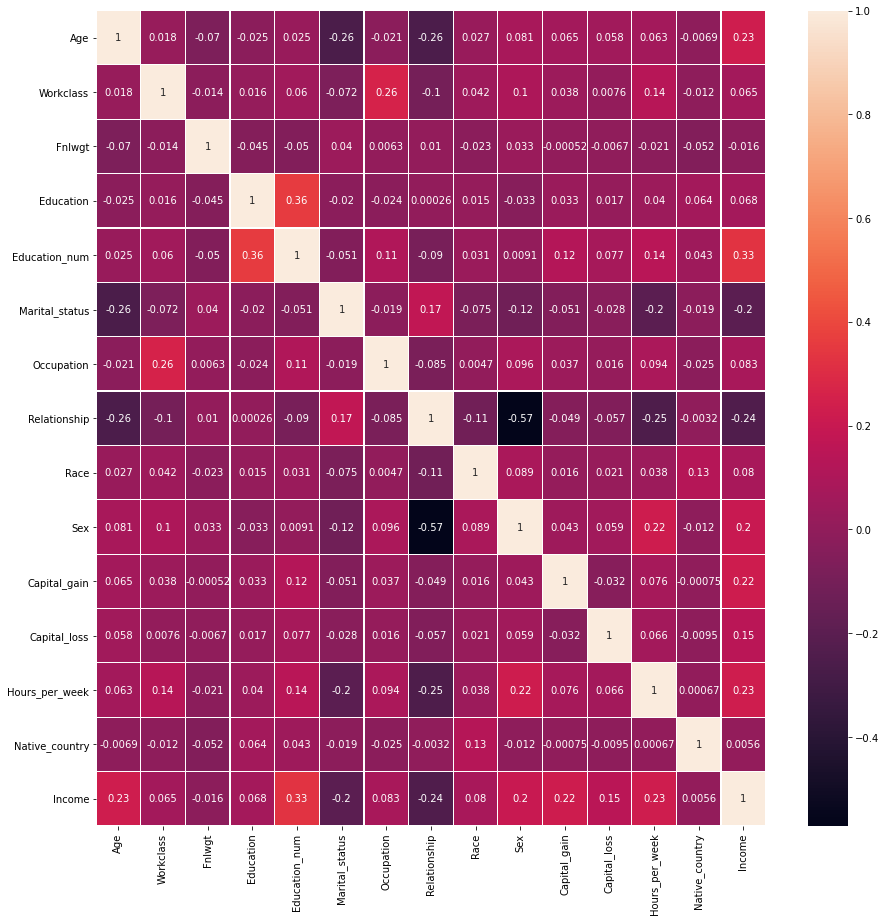

In [49]:
plt.figure(figsize=(15,15))
sns.heatmap(ci.corr(),annot=True,linewidths=0.2)

From the heatmap we can see that there is no positive linear correlation. 

In [50]:
#Dropping the columns which are not relevant in predicting the income

In [51]:
ci.drop(['Fnlwgt', 'Education'], axis=1, inplace=True)

In [52]:
ci

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,13.000000,2.0,4.0,0.0,4.0,1.0,0.000000,0.000000,13.000000,38.0,0.0
1,38,4.0,9.000000,0.0,6.0,1.0,4.0,1.0,0.000000,0.000000,40.000000,38.0,0.0
2,53,4.0,7.000000,2.0,6.0,0.0,2.0,1.0,0.000000,0.000000,40.000000,38.0,0.0
3,28,4.0,13.000000,2.0,10.0,5.0,2.0,0.0,0.000000,0.000000,40.000000,5.0,0.0
4,37,4.0,14.000000,2.0,4.0,5.0,4.0,0.0,0.000000,0.000000,40.000000,38.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10237,20,4.0,9.000000,4.0,6.0,3.0,4.0,1.0,0.000000,0.000000,40.000000,38.0,0.0
10238,24,4.0,13.000000,4.0,4.0,1.0,4.0,0.0,0.000000,0.000000,40.000000,38.0,0.0
10239,29,4.0,9.000000,4.0,8.0,3.0,4.0,0.0,0.000000,0.000000,35.000000,38.0,0.0
10240,31,4.0,13.000000,2.0,4.0,0.0,4.0,1.0,0.000000,2246.000000,45.000000,38.0,1.0


# Splitting into X and Y

In [53]:
x = ci.drop('Income',axis=1)
y = ci['Income']


In [54]:
from sklearn.preprocessing import MinMaxScaler
mns=MinMaxScaler()
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [55]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state =42)

# Model Building

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics #accuracy measure
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [57]:
RFC = RandomForestClassifier(random_state=1,max_depth=10,n_estimators=50)

In [58]:
RFC.fit(x_train,y_train)
y_pred = RFC.predict(x_test)

In [59]:

from sklearn.metrics import accuracy_score

print("Random Forest accuracy", accuracy_score(y_test, y_pred))

Random Forest accuracy 0.8613958028306491


In [60]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion='gini', random_state=21, max_depth=10)

dtree.fit(x_train, y_train)
tree_pred = dtree.predict(x_test)

print("Decision Tree accuracy: ", accuracy_score(y_test, tree_pred))

Decision Tree accuracy:  0.8423621278672523


In [61]:
LR = LogisticRegression()
LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(y_pred,y_test)*100,2)

The accuracy of the Logistic Regression is 81.21034651049293 2


Thus we can see that we are getting best accuracy from Model Random Forest Classifier i.e.87%

# Cross Validation

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [63]:
#Cross Validation for Random Forest classifier
from sklearn.model_selection import cross_val_score
scr=cross_val_score(RFC,x,y,cv=5)

print("cross validation score of Random Forest classifier model :",scr.mean())

cross validation score of Random Forest classifier model : 0.8559858658186921


In [64]:
#Cross Validation for DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
scr=cross_val_score(dtree,x,y,cv=5)

print("cross validation score of DecisionTreeClassifier model :",scr.mean())

cross validation score of DecisionTreeClassifier model : 0.8440742340013422


In [65]:
#Cross Validation for LogisticRegression
from sklearn.model_selection import cross_val_score
scr=cross_val_score(LR,x,y,cv=5)

print("cross validation score of LogisticRegression model :",scr.mean())

cross validation score of LogisticRegression model : 0.8046278767844071


Thus we can confirm that best fit model is Random Forest Classifier (87%) for predicting income thus will be performing hyper parameter tuning test on it.

# Hyper Parameter Tuning 

In [70]:
#Creating Parameters

In [71]:
from sklearn.model_selection import KFold
RFC=RandomForestClassifier()
kf=KFold(n_splits=3)
max_features=np.array([1,2,3,4,5])
n_estimators=np.array([25,50,100,150,200])
min_samples_leaf=np.array([25,50,75,100])
param_grid=dict(n_estimators=n_estimators,max_features=max_features,min_samples_leaf=min_samples_leaf)
grid=GridSearchCV(estimator=RFC,param_grid=param_grid,cv=kf)
gres=grid.fit(x_train,y_train)
print("Best",gres.best_score_)
print("params",gres.best_params_)

Best 0.8524350054924937
params {'max_features': 4, 'min_samples_leaf': 25, 'n_estimators': 200}


In [72]:
RFC=RandomForestClassifier(n_estimators=200,max_features=4,min_samples_leaf=25)
RFC.fit(x_train,y_train)

RandomForestClassifier(max_features=4, min_samples_leaf=25, n_estimators=200)

In [82]:
y_pred=RFC.predict(x_test)
y_pred

array([0., 0., 1., ..., 0., 0., 0.])

In [75]:
print("Accuracy: %f " % (100*accuracy_score(y_test, pred)))

Accuracy: 86.139580 


Thus we observed that Random Forest Classifier giving best accuracy of 86%.

# Saving The Model

In [85]:

import joblib

In [86]:

joblib.dump(grid.best_estimator_,"Census_IncomeModelIDTC.pkl")

['Census_IncomeModelIDTC.pkl']


Conclusion: So here the best model 'RandomForestClassifier' has been saved to calculate the best accuracy score and predict outcomes on new data.